# MULTICLASS FISH IMAGE CLASSIFICATION

#### **NAME OF THE CONTRIBUTOR:**        ABISHEK
#### **BATCH:** JULY 15
#### **PROJECT NUMBER:** 3

### **PROJECT SUMMARY:**

### **GITHUB LINK:**

### **PROBLEM STATEMENT:**

* To build a convolutional nueral network which can classify the images of the fishes that are being shown to them.
* Using Transfer learning to use the power of pre-trained models
* Deploying the best performing model in streamlit application to showcase the ability of the model in classifying the images.

### **DATA PREPROCESSING AND AUGMENTATION:**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

#unzipping the file to the working directory
!unzip '/content/drive/MyDrive/third_project/project 3 dataset.zip' -d /content/



Streaming output truncated to the last 5000 lines.
  inflating: /content/images.cv_jzk6llhf18tm3k0kyttxz/data/train/fish sea_food gilt_head_bream/KF3D8XIXVZOD.jpg  
  inflating: /content/images.cv_jzk6llhf18tm3k0kyttxz/data/train/fish sea_food gilt_head_bream/KWS8S1W9I9PG.jpg  
  inflating: /content/images.cv_jzk6llhf18tm3k0kyttxz/data/train/fish sea_food gilt_head_bream/LRPEM4RGWRY7.jpg  
  inflating: /content/images.cv_jzk6llhf18tm3k0kyttxz/data/train/fish sea_food gilt_head_bream/ZHYP7L0380A5.jpg  
  inflating: /content/images.cv_jzk6llhf18tm3k0kyttxz/data/train/fish sea_food gilt_head_bream/LA6K9A1Z300T.jpg  
  inflating: /content/images.cv_jzk6llhf18tm3k0kyttxz/data/train/fish sea_food gilt_head_bream/DSTJ0FNZ17NI.jpg  
  inflating: /content/images.cv_jzk6llhf18tm3k0kyttxz/data/train/fish sea_food gilt_head_bream/8HEN19LAPJGS.jpg  
  inflating: /content/images.cv_jzk6llhf18tm3k0kyttxz/data/train/fish sea_food gilt_head_bream/7UQQICO4NVWK.jpg  
  inflating: /content/images.cv_jzk6l

In [2]:
# updating the basepath
base_path = '/content/images.cv_jzk6llhf18tm3k0kyttxz/data/'

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Train data generator (with augmentation)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

# Validation and Test data generators (no augmentation)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load train data
train_generator = train_datagen.flow_from_directory(
    directory=base_path + 'train/',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Load validation data (already separated)
val_generator = val_datagen.flow_from_directory(
    directory=base_path + 'val/',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Load test data
test_generator = test_datagen.flow_from_directory(
    directory=base_path + 'test/',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


Found 6225 images belonging to 11 classes.
Found 1092 images belonging to 11 classes.
Found 3177 images belonging to 11 classes.


# MODEL TRAINING

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape = (224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Prevents overfitting


model.add(Dense(11, activation='softmax'))
model.summary()


model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │         1,419 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,170,379 (42.61 MB)

 Trainable params: 11,170,379 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# training the model
history = model.fit(train_generator , epochs = 10 , validation_data = val_generator)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 92s 433ms/step - accuracy: 0.2389 - loss: 2.1980 - val_accuracy: 0.3984 - val_loss: 1.6348
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 76s 391ms/step - accuracy: 0.3811 - loss: 1.6491 - val_accuracy: 0.5192 - val_loss: 1.3601
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 89s 427ms/step - accuracy: 0.4824 - loss: 1.3809 - val_accuracy: 0.5449 - val_loss: 1.1225
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 81s 416ms/step - accuracy: 0.5453 - loss: 1.1886 - val_accuracy: 0.6511 - val_loss: 0.9255
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 78s 398ms/step - accuracy: 0.6066 - loss: 1.0671 - val_accuracy: 0.6941 - val_loss: 0.8484
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 77s 394ms/step - accuracy: 0.6527 - loss: 0.9400 - val_accuracy: 0.7445 - val_loss: 0.7557
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 82s 393ms/step - accuracy: 0.6602 - loss: 0.8816 - val_accuracy: 0.7747 - val_loss: 0.6156
Epoch 8/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 77s 396ms/step - accuracy: 0.6900 - loss: 0

 MODEL EVALUATION

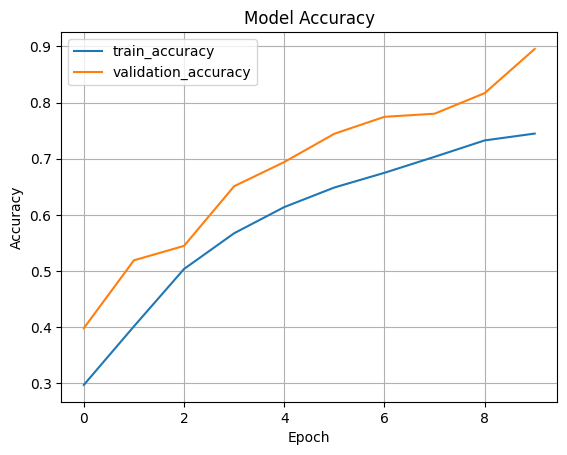

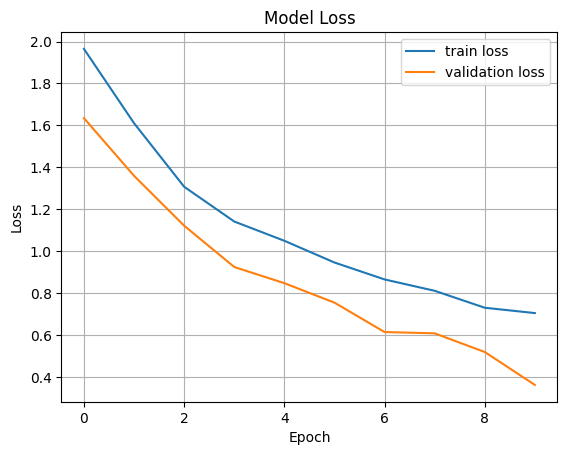

In [6]:
from matplotlib import pyplot as plt
#visualization of model's accuracy
plt.plot(history.history['accuracy'],label = 'train_accuracy')
plt.plot(history.history['val_accuracy'],label = 'validation_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# visualization of model's loss
plt.plot(history.history['loss'],label = 'train loss')
plt.plot(history.history['val_loss'],label = 'validation loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
# evaluating the model's performance on test dataset
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

# saving the model for loading it later
model.save("fish_cnn_model.h5")


100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 66ms/step - accuracy: 0.9127 - loss: 0.2913


Test Loss: 0.3608
Test Accuracy: 0.8870


## TRANSFER LEARNING WITH PRE-TRAINED MODELS( VGG16 )

In [8]:
# loading VGG16 model
from tensorflow.keras.applications import VGG16
base_model = VGG16(weights = 'imagenet', include_top = False, input_shape = (224,224,3))
base_model.summary()

#Freezing the base layer
base_model.trainable = False

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout, GlobalAveragePooling2D

# adding custom layers on the top of pre-trained model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128,activation = 'relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(11,activation = 'softmax')(x)

#final model
model = Model(inputs = base_model.input, outputs = predictions)

# compiling the model
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [10]:
# training the pre-trained model with train generator dataset
history_vgg = model.fit(train_generator , epochs = 10 , validation_data = val_generator)

Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 113s 512ms/step - accuracy: 0.2770 - loss: 2.1029 - val_accuracy: 0.7289 - val_loss: 1.3370
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 86s 442ms/step - accuracy: 0.5839 - loss: 1.3416 - val_accuracy: 0.7830 - val_loss: 0.9130
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 89s 455ms/step - accuracy: 0.6976 - loss: 0.9982 - val_accuracy: 0.8617 - val_loss: 0.6678
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 90s 461ms/step - accuracy: 0.7465 - loss: 0.8205 - val_accuracy: 0.8864 - val_loss: 0.5334
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 86s 439ms/step - accuracy: 0.7977 - loss: 0.6823 - val_accuracy: 0.8846 - val_loss: 0.4698
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 88s 452ms/step - accuracy: 0.8104 - loss: 0.6011 - val_accuracy: 0.9084 - val_loss: 0.3770
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 86s 441ms/step - accuracy: 0.8381 - loss: 0.5290 - val_accuracy: 0.9139 - val_loss: 0.3487
Epoch 8/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 88s 449ms/step - accuracy: 0.8487 - loss: 

MODEL EVALUATION IN PRE-TRAINED MODEL

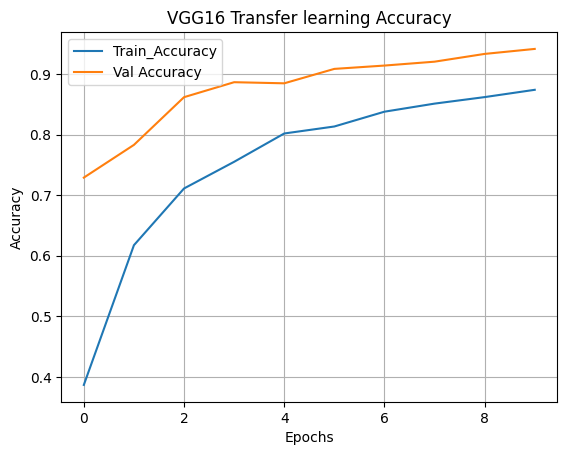

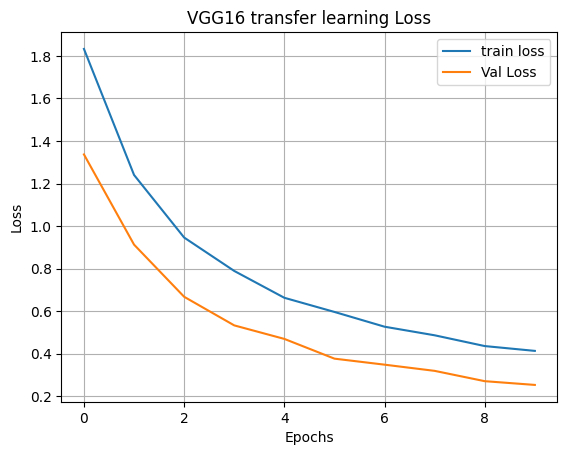

In [11]:
from types import LambdaType
# visualizing the accuracy of the model
plt.plot(history_vgg.history['accuracy'], label = 'Train_Accuracy')
plt.plot(history_vgg.history['val_accuracy'], label = 'Val Accuracy')
plt.title('VGG16 Transfer learning Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# visuals of loss of the models
plt.plot(history_vgg.history['loss'], label = 'train loss')
plt.plot(history_vgg.history['val_loss'], label = 'Val Loss')
plt.title('VGG16 transfer learning Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
# Evaluate the model on test dataset
test_loss, test_acc = model.evaluate(test_generator)
print("VGG16 Test Accuracy:", test_acc)
print("VGG16 Test Loss:", test_loss)


100/100 ━━━━━━━━━━━━━━━━━━━━ 21s 211ms/step - accuracy: 0.9644 - loss: 0.1737
VGG16 Test Accuracy: 0.947434663772583
VGG16 Test Loss: 0.2347894161939621


In [13]:
# saving the model
model.save('fish_classifier_vgg16.h5')

##  Fine-tuning the fish_classifier_vgg16 model

In [14]:

from tensorflow.keras.models import load_model
model = load_model("fish_classifier_vgg16.h5")

# unfreezing some of the last VGG16 layers
for layer in model.layers:
    layer.trainable = True  # temporarily make everything trainable

# freezing all layers except the last 4 convolutional blocks
for layer in model.layers[:-4]:
    layer.trainable = False

from tensorflow.keras.optimizers import Adam

model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=1e-5),
    metrics=['accuracy']
)


In [15]:
# fine-tuning the newly trained vgg16 model
fine_tune_history = model.fit(
    train_generator,
    epochs=5,
    validation_data=val_generator
)

Epoch 1/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 94s 464ms/step - accuracy: 0.8841 - loss: 0.3955 - val_accuracy: 0.9405 - val_loss: 0.2460
Epoch 2/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 137s 448ms/step - accuracy: 0.8873 - loss: 0.3755 - val_accuracy: 0.9423 - val_loss: 0.2431
Epoch 3/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 92s 470ms/step - accuracy: 0.8999 - loss: 0.3592 - val_accuracy: 0.9432 - val_loss: 0.2404
Epoch 4/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 92s 469ms/step - accuracy: 0.8846 - loss: 0.3844 - val_accuracy: 0.9432 - val_loss: 0.2406
Epoch 5/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 87s 446ms/step - accuracy: 0.8868 - loss: 0.3686 - val_accuracy: 0.9432 - val_loss: 0.2395


In [16]:
# Evaluating the model
test_loss, test_acc = model.evaluate(test_generator)
print("Fine-tuned VGG16 Test Accuracy:", test_acc)
print("Fine-tuned VGG16 Loss : ", test_loss)

model.save("fish_classifier_vgg16_finetuned.h5")


100/100 ━━━━━━━━━━━━━━━━━━━━ 17s 169ms/step - accuracy: 0.9630 - loss: 0.1672


Fine-tuned VGG16 Test Accuracy: 0.9493232369422913
Fine-tuned VGG16 Loss :  0.21842190623283386


## BUILDING RESNET50 MODEL

In [17]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout

# Load base ResNet50
base_model = ResNet50(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)
# freezing the base layer
base_model.trainable = False

#adding custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(11, activation='softmax')(x)

model_resnet = Model(inputs=base_model.input, outputs=predictions)

#compiling the model
model_resnet.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=1e-4),  # slightly higher LR for frozen base
    metrics=['accuracy']
)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [18]:
# training the model_resnet
history_resnet = model_resnet.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)

Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 106s 476ms/step - accuracy: 0.1226 - loss: 2.5840 - val_accuracy: 0.1712 - val_loss: 2.2919
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 79s 404ms/step - accuracy: 0.1651 - loss: 2.3138 - val_accuracy: 0.1712 - val_loss: 2.2672
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 80s 411ms/step - accuracy: 0.1714 - loss: 2.2964 - val_accuracy: 0.1712 - val_loss: 2.2468
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 78s 402ms/step - accuracy: 0.1775 - loss: 2.2740 - val_accuracy: 0.1712 - val_loss: 2.2224
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 80s 411ms/step - accuracy: 0.1955 - loss: 2.2408 - val_accuracy: 0.1667 - val_loss: 2.2034
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 81s 415ms/step - accuracy: 0.1924 - loss: 2.2379 - val_accuracy: 0.1639 - val_loss: 2.1900
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 80s 412ms/step - accuracy: 0.1893 - loss: 2.2240 - val_accuracy: 0.1694 - val_loss: 2.1641
Epoch 8/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 81s 418ms/step - accuracy: 0.1957 - loss: 

In [19]:
# evaluating on test dataset
test_loss, test_acc = model_resnet.evaluate(test_generator)
print("ResNet50 Test Accuracy:", test_acc)
print("ResNet50 Test loss: ",test_loss)

100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 115ms/step - accuracy: 0.3844 - loss: 1.8761
ResNet50 Test Accuracy: 0.18224740028381348
ResNet50 Test loss:  2.125943422317505


### Fine-Tuning the model

In [20]:
model_resnet.save("fish_classifier_resnet50.h5")

In [21]:
from tensorflow.keras.models import load_model
model_resnet = load_model("fish_classifier_resnet50.h5")

# Unfreezing all the layers
for layer in model_resnet.layers:
    layer.trainable = True

# Freezing all layers but except last 10 layers
for layer in model_resnet.layers[:-10]:
    layer.trainable = False

from tensorflow.keras.optimizers import Adam

model_resnet.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=1e-5),  # low LR to avoid damaging learned features
    metrics=['accuracy']
)


In [22]:
# training the fine tuned model
fine_tune_resnet = model_resnet.fit(
    train_generator,
    epochs=5,  #
    validation_data=val_generator
)

Epoch 1/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 102s 457ms/step - accuracy: 0.1814 - loss: 2.9488 - val_accuracy: 0.2335 - val_loss: 2.1258
Epoch 2/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 81s 417ms/step - accuracy: 0.2192 - loss: 2.1250 - val_accuracy: 0.2637 - val_loss: 2.0116
Epoch 3/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 78s 398ms/step - accuracy: 0.2495 - loss: 2.0834 - val_accuracy: 0.3141 - val_loss: 1.9621
Epoch 4/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 85s 415ms/step - accuracy: 0.2674 - loss: 2.0378 - val_accuracy: 0.3068 - val_loss: 1.9289
Epoch 5/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 80s 410ms/step - accuracy: 0.2776 - loss: 2.0134 - val_accuracy: 0.3516 - val_loss: 1.9075


MODEL EVALUATION OF RESNET50 MODEL

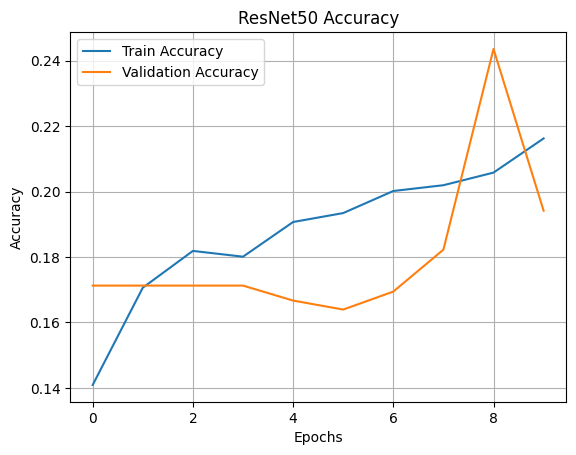

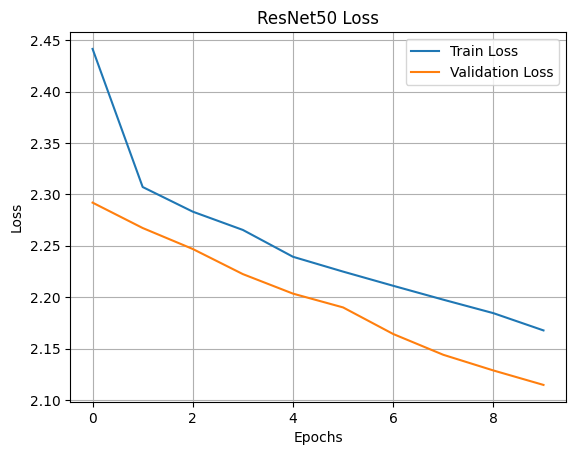

In [23]:
# visualizing the loss and accuracy for ResNet50
plt.plot(history_resnet.history['accuracy'],label = 'Train Accuracy')
plt.plot(history_resnet.history['val_accuracy'],label = 'Validation Accuracy')
plt.title("ResNet50 Accuracy")
plt.xlabel("Epochs")
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()
#loss
plt.plot(history_resnet.history['loss'],label = 'Train Loss')
plt.plot(history_resnet.history['val_loss'],label = 'Validation Loss')
plt.title("ResNet50 Loss")
plt.xlabel("Epochs")
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [24]:
test_loss, test_acc = model_resnet.evaluate(test_generator)
print("Fine-tuned ResNet50 Test Accuracy:", test_acc)

model_resnet.save("fish_classifier_resnet50_finetuned.h5")


100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 102ms/step - accuracy: 0.4867 - loss: 1.5981


Fine-tuned ResNet50 Test Accuracy: 0.3519043028354645


## BUILDING EFFICIENTNETB0 MODEL

In [32]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import GlobalAveragePooling2D,Dense,Dropout

base_model = EfficientNetB0(weights = 'imagenet', include_top = False, input_shape = (224,224,3))
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation = 'relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(11,activation = 'softmax')(x)

model_efficient = Model(inputs = base_model.input, outputs = predictions)
model_efficient.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=1e-4),
    metrics=['accuracy']
)

# training the model_efficient
history_efficient = model_efficient.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)


Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 119s 489ms/step - accuracy: 0.1354 - loss: 2.3778 - val_accuracy: 0.1712 - val_loss: 2.3177
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 77s 396ms/step - accuracy: 0.1691 - loss: 2.3253 - val_accuracy: 0.1712 - val_loss: 2.3158
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 78s 399ms/step - accuracy: 0.1609 - loss: 2.3375 - val_accuracy: 0.1712 - val_loss: 2.3145
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 81s 395ms/step - accuracy: 0.1702 - loss: 2.3186 - val_accuracy: 0.1712 - val_loss: 2.3129
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 77s 392ms/step - accuracy: 0.1727 - loss: 2.3189 - val_accuracy: 0.1712 - val_loss: 2.3126
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 76s 388ms/step - accuracy: 0.1721 - loss: 2.3212 - val_accuracy: 0.1712 - val_loss: 2.3128
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 75s 387ms/step - accuracy: 0.1827 - loss: 2.3090 - val_accuracy: 0.1712 - val_loss: 2.3124
Epoch 8/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 81s 382ms/step - accuracy: 0.1832 - loss: 

In [26]:
# evaluating the model_efficient
test_loss , test_acc = model_efficient.evaluate(test_generator)
print("EfficientNetB0 Test Accuracy:", test_acc)
print("EfficientNetB0 Test loss: ",test_loss)

100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 110ms/step - accuracy: 0.4451 - loss: 2.1455
EfficientNetB0 Test Accuracy: 0.16052879393100739
EfficientNetB0 Test loss:  2.3082761764526367


In [27]:
model_efficient.save("fish_classifier_efficientnetb0.h5")

### Fine-Tunning the model

In [28]:
model_efficient = load_model("fish_classifier_efficientnetb0.h5")

# First, make everything trainable
for layer in model_efficient.layers:
    layer.trainable = True

for layer in model_efficient.layers[:-20]:
    layer.trainable = False

model_efficient.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=1e-5),
    metrics=['accuracy']
)


In [29]:
fine_tune_efficient = model_efficient.fit(
    train_generator,
    epochs=5,
    validation_data=val_generator
)

Epoch 1/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 123s 500ms/step - accuracy: 0.1428 - loss: 2.3729 - val_accuracy: 0.1712 - val_loss: 2.3158
Epoch 2/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 79s 403ms/step - accuracy: 0.1583 - loss: 2.3476 - val_accuracy: 0.1712 - val_loss: 2.3152
Epoch 3/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 76s 390ms/step - accuracy: 0.1599 - loss: 2.3322 - val_accuracy: 0.1712 - val_loss: 2.3118
Epoch 4/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 85s 405ms/step - accuracy: 0.1667 - loss: 2.3197 - val_accuracy: 0.1712 - val_loss: 2.3108
Epoch 5/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 78s 401ms/step - accuracy: 0.1678 - loss: 2.3220 - val_accuracy: 0.1712 - val_loss: 2.3098


In [34]:
test_loss, test_acc = model_efficient.evaluate(test_generator)
print("Fine-tuned EfficientNetB0 Test Accuracy:", test_acc)
print("Fine-tuned EfficientNetB0 test Loss: ",test_loss)

100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 113ms/step - accuracy: 0.4451 - loss: 2.1526
Fine-tuned EfficientNetB0 Test Accuracy: 0.16052879393100739
Fine-tuned EfficientNetB0 test Loss:  2.3077104091644287


MODEL EVALUATION FOR EFFICIENTNETB0 MODEL

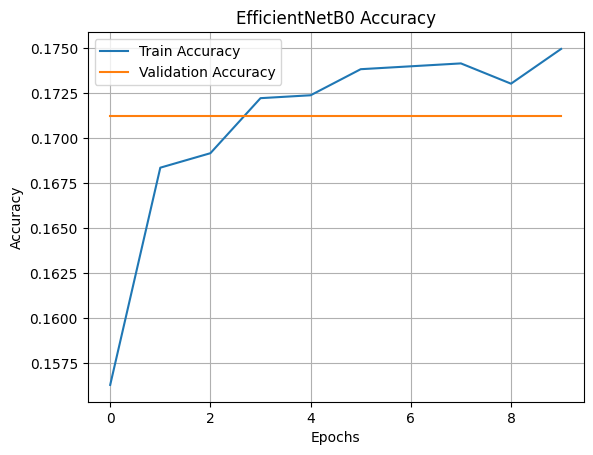

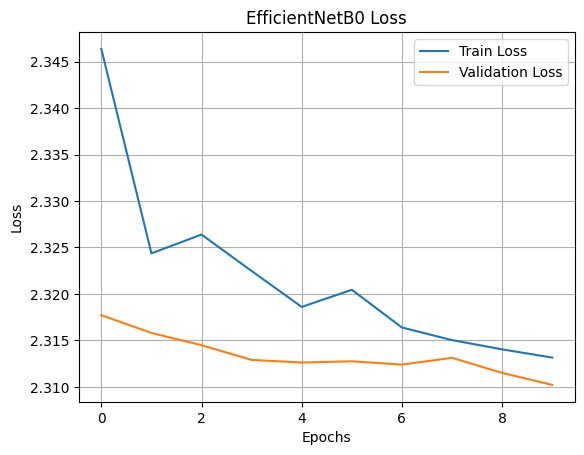

In [35]:
# visualizing the accuracy and loss of EfficientNetB0 model
plt.plot(history_efficient.history['accuracy'],label = 'Train Accuracy')
plt.plot(history_efficient.history['val_accuracy'],label = 'Validation Accuracy')
plt.title("EfficientNetB0 Accuracy")
plt.xlabel("Epochs")
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# visuals for loss
plt.plot(history_efficient.history['loss'],label = 'Train Loss')
plt.plot(history_efficient.history['val_loss'],label = 'Validation Loss')
plt.title("EfficientNetB0 Loss")
plt.xlabel("Epochs")
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


### MODEL COMPARISON GUIDE






Based on the test set evaluation, here's a comparison of the models trained:

| Model                      | Test Accuracy | Test Loss |
|----------------------------|---------------|-----------|
| Custom CNN                 | 88.70 %         | 11.30 %       |
| VGG16 (Transfer Learning)  | 94.74 %         | 5.26 %       |
| Fine-tuned VGG16           | 94.93 %         | 5.07 %       |
| ResNet50 (Transfer Learning)|  18.22 %        |  81.78 %      |
| Fine-tuned ResNet50        |      35.19 %    |     64.81 %   |
| EfficientNetB0 (Transfer Learning)|     16.05 %     | 83.95 %       |
| Fine-tuned EfficientNetB0  | 16.05 %         | 83.95 %       |

**Observations:**

*   **Custom CNN:** Achieved a decent accuracy of 88.70 % on the test set.
*   **VGG16 (Transfer Learning):** Showed significant improvement compared to the custom CNN with a test accuracy of 94.76 %. This indicates the effectiveness of using a pre-trained model.
*   **Fine-tuned VGG16:** Further fine-tuning the VGG16 model resulted in a slight improvement in test accuracy to 94.93 %, suggesting that adapting the pre-trained layers to the specific dataset can be beneficial.
*   **ResNet50 (Transfer Learning):** The initial ResNet50 transfer learning model performed poorly with a low test accuracy of 18.22 %. This might be due to the model being frozen and the added layers not being sufficient to learn the features of the fish dataset effectively.
*   **Fine-tuned ResNet50:** Fine-tuning the ResNet50 model did not lead to significant improvement, with a test accuracy of 35.19 %  This could indicate that the base ResNet50 model, even when partially unfrozen, is not as suitable for this dataset compared to VGG16.
*   **EfficientNetB0 (Transfer Learning):** Similar to ResNet50, the initial EfficientNetB0 transfer learning model also showed poor performance with a test accuracy of 16.05 %
*   **Fine-tuned EfficientNetB0:** Fine-tuning EfficientNetB0 did not improve the performance, resulting in a test accuracy of 16.05 %.



### CONCLUSION

Based on these results, the **Fine-tuned VGG16** model achieved the highest test accuracy of **94.93 %**, making it the best-performing model among the ones evaluated for this multiclass fish image classification task. The transfer learning approach with VGG16 proved to be much more effective than training a custom CNN from scratch or using ResNet50 and EfficientNetB0 for this dataset.